In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
def create_df(file):
    path = os.path.join(file)
    return pd.read_csv(path)
    
mouse_df = create_df(mouse_drug_data_to_load)
clinical_trial_df = create_df(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(left=clinical_trial_df, right=mouse_df, left_on="Mouse ID", right_on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
#Create dataframe to show change in tumor volume (mean) by time and drug

In [3]:
tumor_response_vol_df = df.groupby(["Drug","Timepoint"]).\
agg({"Tumor Volume (mm3)":'mean'}).\
reset_index()

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

In [5]:
tumor_response_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame

In [7]:
# Create a dataframe to show the standard error mean by drug and timepoint
#df_std_error_mean

In [8]:
df_std_error_mean = df.groupby(["Drug","Timepoint"]).\
sem().\
reset_index()

In [9]:
#Create tumor vol std error mean dataframe

In [10]:
tumor_vol_std_error_mean = df_std_error_mean.drop(["Metastatic Sites", "Mouse ID"], axis = 1)

In [11]:
tumor_vol_std_error_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
tumor_vol_std_error_mean = tumor_vol_std_error_mean.pivot(index="Timepoint", columns="Drug", values='Tumor Volume (mm3)')

In [13]:
tumor_vol_std_error_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [14]:
tumor_response_vol_df = tumor_response_vol_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

In [15]:
tumor_response_vol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Tumor Response to Treatement

    Generate plot to show Tumor Response to Treatment (Tumor Vol) with error bars

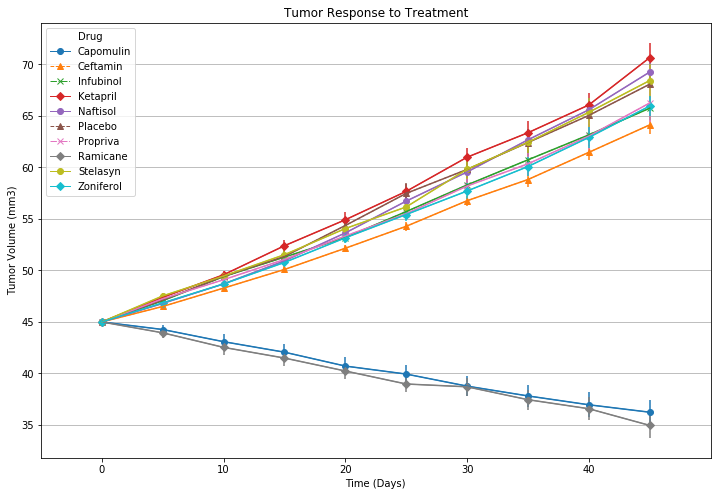

In [16]:
#plot error bars
ax = tumor_response_vol_df.plot(figsize=(12,8), yerr = tumor_vol_std_error_mean, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
tumor_response_vol_df.plot(figsize=(12,8),\
                       style=['o-', '^--', 'x-.', 'D-','o-', '^--', 'x-.', 'D-', "o-", "D-"],
                       markersize=6, ax = ax, linewidth = 1)
ax.set_xlabel("Time (Days)", fontsize=10)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=10 )
ax.set_title("Tumor Response to Treatment", fontsize = 12)
ax.yaxis.grid(True)
ax.set_xlim([-5, 50])
plt.xticks([0,10,20,30,40,])
plt.show()

## Metastatic Spread During Treatement

In [17]:
mean_metabolic_site_df = df.groupby(["Drug","Timepoint"]).\
agg({"Metastatic Sites":'mean'}).\
reset_index()


In [18]:
mean_metabolic_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [19]:
mean_metabolic_site_stderror = df_std_error_mean.drop(["Tumor Volume (mm3)", "Mouse ID"], axis = 1)

In [20]:
mean_metabolic_site_stderror.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [21]:
mean_metabolic_site_df = mean_metabolic_site_df.pivot(index="Timepoint", columns="Drug", values='Metastatic Sites')

In [22]:
mean_metabolic_site_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [23]:
mean_metabolic_site_stderror = mean_metabolic_site_stderror.pivot(index="Timepoint", columns="Drug", values='Metastatic Sites')

In [24]:
mean_metabolic_site_stderror.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


## Metastatic Spread During Treatement
    Generate plot to show Tumor Response to Treatment (metastatic sites) with error bars

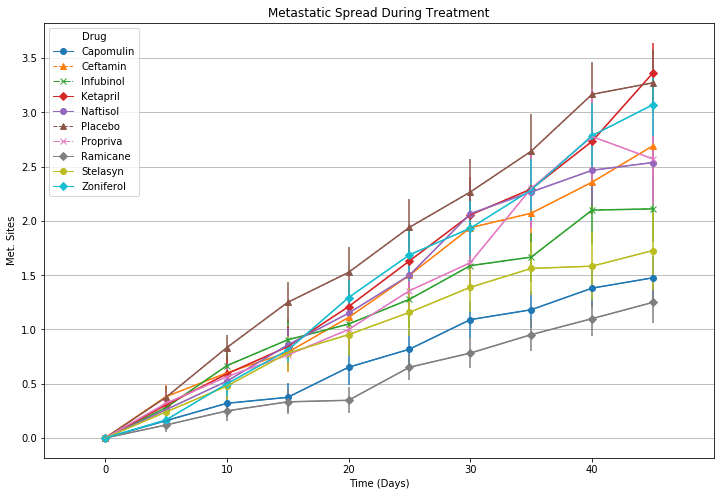

In [25]:
#plot error bars
ax = mean_metabolic_site_df.plot(figsize=(12,8), yerr = mean_metabolic_site_stderror, legend = False)
#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
mean_metabolic_site_df.plot(figsize=(12,8),\
                       style=['o-', '^--', 'x-.', 'D-','o-', '^--', 'x-.', 'D-', "o-", "D-"],
                       markersize=6, ax = ax, linewidth = 1)
ax.set_xlabel("Time (Days)", fontsize=10)
ax.set_ylabel("Met. Sites", fontsize=10 )
ax.set_title("Metastatic Spread During Treatment", fontsize = 12)
ax.yaxis.grid(True)
ax.set_xlim([-5, 50])
plt.xticks([0,10,20,30,40,])
plt.show()

## Survival Rates

In [26]:
mouse_survival_df = df.groupby(["Drug","Timepoint"]).\
agg({"Mouse ID":'size'}).\
reset_index()

In [27]:
mouse_survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
mouse_survival_df.rename(columns = {"Mouse ID":"Mouse Count"}, inplace = True)

In [29]:
mouse_survival_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [30]:
mouse_survival_df = mouse_survival_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

In [31]:
mouse_survival_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [32]:
mouse_survival_percent_df = mouse_survival_df.divide(mouse_survival_df.ix[0])*100

In [33]:
mouse_survival_percent_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


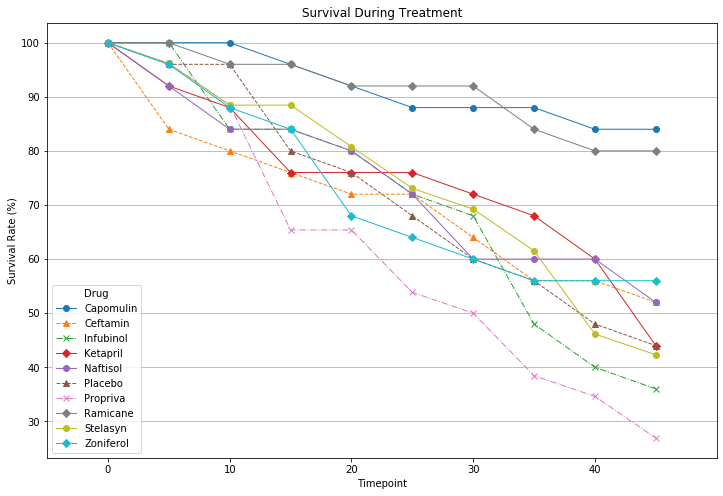

In [43]:
#plot the markers

ax = mouse_survival_percent_df.plot(figsize=(12,8),\
                       style=['o-', '^--', 'x-.', 'D-','o-', '^--', 'x-.', 'D-', "o-", "D-"],
                       markersize=6, linewidth = 1)
ax.set_ylabel("Survival Rate (%)", fontsize=10,)
ax.set_title("Survival During Treatment", fontsize = 12)
ax.yaxis.grid(True)
ax.set_xlim([-5, 50])
plt.xticks([0,10,20,30,40,])
plt.show()